In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
import os.path as op

In [4]:
from AFQ import api

In [6]:
import AFQ.data as afd
import AFQ.viz as afv

In [7]:
afd.organize_stanford_data()

Dataset is already in place. If you want to fetch it again please first remove the folder /Users/arokem/.dipy/stanford_hardi 


In [8]:
base_dir = op.join(op.expanduser('~'), 'AFQ_data', 'stanford_hardi')

In [9]:
op.join(afd.afq_home, 'stanford_hard')

'/Users/arokem/AFQ_data/stanford_hard'

In [10]:
myafq = api.AFQ(preproc_path=op.join(afd.afq_home, 'stanford_hardi'), sub_prefix='sub')

In [11]:
myafq.data_frame

,anat_file,bval_file,bvec_file,dwi_file,seg_file,sess,subject,gtab,dwi_affine
0,/Users/arokem/AFQ_data/stanford_hardi/sub-01/s...,/Users/arokem/AFQ_data/stanford_hardi/sub-01/s...,/Users/arokem/AFQ_data/stanford_hardi/sub-01/s...,/Users/arokem/AFQ_data/stanford_hardi/sub-01/s...,/Users/arokem/AFQ_data/stanford_hardi/sub-01/s...,/Users/arokem/AFQ_data/stanford_hardi/sub-01/s...,sub-01,<dipy.core.gradients.GradientTable object at 0...,"[[2.0, 0.0, 0.0, -80.0], [0.0, 2.0, 0.0, -120...."


In [12]:
myafq.brain_mask

0    /Users/arokem/AFQ_data/stanford_hardi/sub-01/s...
Name: brain_mask_file, dtype: object

In [13]:
import nibabel as nib

In [14]:
dti_img = nib.load(myafq.dti[0])
dti_data = dti_img.get_data()

In [15]:
myafq['gtab']

0    <dipy.core.gradients.GradientTable object at 0...
Name: gtab, dtype: object

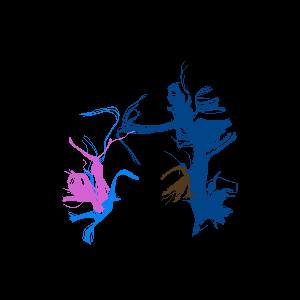

In [18]:
ren = afv.visualize_bundles(myafq.bundles[0])